# Phase 3: Exploratory Data Analysis (EDA)

**Primary Objective**: Empirical analysis of tabular features for **Module A (Academic Risk)**.

> **Guardian of Research Integrity Note**: This EDA focuses exclusively on the 2,000 tabular records in `raw.csv`. Module B (NLP) will utilize synthetic narratives for architectural demonstration, decoupled from this empirical analysis to maintain structural rigor.

## 1. Load Dataset
We load the `raw.csv` dataset containing student lifestyle and academic performance data.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# specific styling
sns.set_style('whitegrid')

# Load data
DATA_PATH = '../data/raw.csv'
try:
    df = pd.read_csv(DATA_PATH)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at {DATA_PATH}")

Dataset loaded successfully.


## 2. Initial Data Inspection
Checking the structure, columns, and data types.

In [8]:
display(df.head())
print(f"Shape: {df.shape}")

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


Shape: (2000, 8)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [10]:
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


## 3. Missing Values Analysis

In [11]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

## 4. Target Variable Distribution
Analyzing the distribution of `Stress_Level` (Target for Module B).

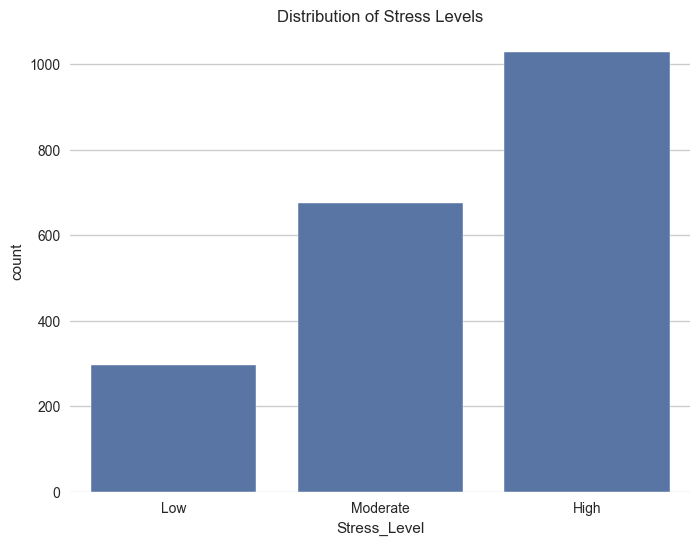

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Stress_Level', data=df, order=['Low', 'Moderate', 'High'])
plt.title('Distribution of Stress Levels')
plt.show()

## 5. Correlation Analysis
Understanding relationships between lifestyle factors and GPA.

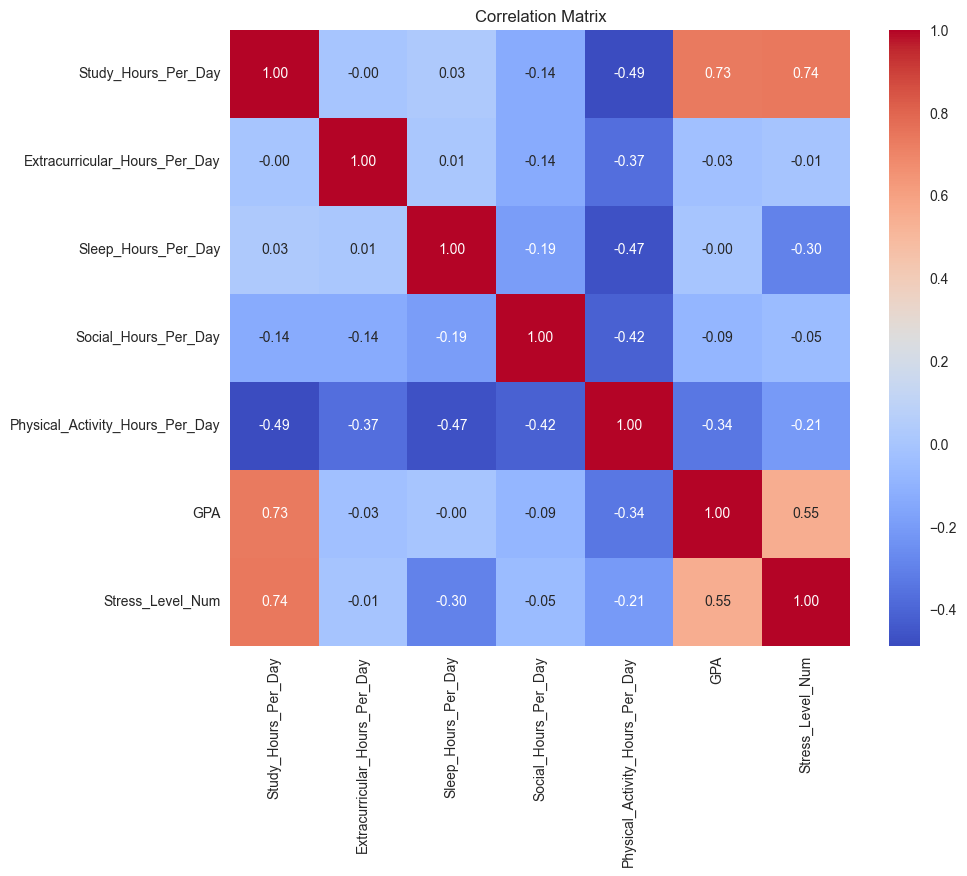

In [15]:
# Encode Stress_Level for correlation
df_encoded = df.copy()
stress_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
df_encoded['Stress_Level_Num'] = df_encoded['Stress_Level'].map(stress_mapping)

correlation_matrix = df_encoded.drop(columns=['Student_ID']).corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()